In [1]:
import pandas as pd
from operator import itemgetter
import ast

import matplotlib.pyplot as plt

import networkx as nx
import networkx.algorithms.community as nx_comm
import numpy as np
import math

In [2]:
# Baca file csv
df = pd.read_csv("concatresult.csv", index_col = [0])

C:\Users\BAlif\AppData\Local\Temp\ipykernel_12092\475957051.py:2: DtypeWarning: Columns (0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("concatresult.csv", index_col = [0])


In [3]:
df.tail()

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
140379,17185461,cratylus,"Programmer interested in Philosophy,Maths and ...","Perth, Australia",661,955.0,13348.0,2008-11-05 09:20:13.000000,1498440721015078912.0,2022-02-28 23:31:22,9.0,✍️The fifth day of Russian Invasion - summary ...,[],en,NaN,0.0,2022-02-28 23:32:03.485217
140380,3314420144,DyNEn_L,ก็รักไปแล้ว จะให้กูทำยังไง🍋🍊\nสถานะ:ตายในหน้าท...,หาเจอได้ตามป่า,472,106.0,95050.0,2015-08-13 14:26:37.000000,1498440721019600896.0,2022-02-28 23:31:22,4199.0,สวิสเซอร์แลนด์หยุดเป็นกลาง\nอายัดทรัพย์สินปูติ...,[],th,NaN,0.0,2022-02-28 23:32:03.470264
140381,979378741884407810,son_sonnnn,NaN,NaN,158,13.0,576.0,2018-03-29 15:24:22.000000,1498440721157787648.0,2022-02-28 23:31:22,12.0,🇺🇦 Как работают диверсионные маячки!\n\n#Украи...,"[{'text': 'Украина', 'indices': [54, 62]}, {'t...",ru,NaN,0.0,2022-02-28 23:32:03.463382
140382,324746604,OS_Beaver,Huge Oregon State Beavers fan! Time for the R...,Oregon,2813,392.0,7459.0,2011-06-27 04:24:42.000000,1498440721459679232.0,2022-02-28 23:31:22,597.0,Mayor of Kharkiv: many dead and wounded during...,[],en,NaN,0.0,2022-02-28 23:32:03.448230
140383,2770429273,quovadisschland,"WIR,Franzl,Kaiser v.Österreich u.König v.Ungar...",Deutschland,838,440.0,37737.0,2014-08-26 16:32:10.000000,1498440722235772928.0,2022-02-28 23:31:22,11.0,Mehrheit der Finnen ist für #NATO-Beitritt Fin...,"[{'text': 'NATO', 'indices': [47, 52]}, {'text...",de,NaN,0.0,2022-02-28 23:32:03.432742


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 330944 entries, 0 to 140383
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   userid          194597 non-null  object 
 1   username        194597 non-null  object 
 2   acctdesc        164147 non-null  object 
 3   location        113983 non-null  object 
 4   following       171783 non-null  object 
 5   followers       171780 non-null  float64
 6   totaltweets     171780 non-null  object 
 7   usercreatedts   171780 non-null  object 
 8   tweetid         171780 non-null  object 
 9   tweetcreatedts  171780 non-null  object 
 10  retweetcount    171780 non-null  object 
 11  text            171777 non-null  object 
 12  hashtags        140381 non-null  object 
 13  language        140381 non-null  object 
 14  coordinates     12 non-null      object 
 15  favorite_count  140378 non-null  float64
 16  extractedts     140378 non-null  object 
dtypes: float64(2), 

In [5]:
hashtags = []

for idx, i in enumerate(df.iloc[:,12:13].get("hashtags")):
  if isinstance(i, str) and i != '0':
    for j in ast.literal_eval(i):
      hashtag = {
        "id" : df.iloc[idx]["tweetid"],
        "tag": j.get("text")
      }
      hashtags.append(hashtag)
hashtags_df = pd.DataFrame(hashtags)
hashtags_df

,id,tag
0,1498318245404762119,Putin
1,1498318245446696966,Putin
2,1498318245710995457,PS4
3,1498318245710995457,PS5
4,1498318245710995457,Ukraine
...,...,...
303252,1498440721157787648.0,RussiaUkraineConflict
303253,1498440721157787648.0,StopPutin
303254,1498440721157787648.0,UkraineRussia
303255,1498440722235772928.0,NATO


In [6]:
tweets_hashtag_df = hashtags_df.merge(df, left_on='id', right_on='tweetid')
tweets_hashtag_df.head()

,id,tag,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
0,1498318245404762119,Putin,802649176299466752,Emolclause,#TheResistance #ExpandTheCourt #EndTheFilibust...,NaN,91906,113262.0,91222,2016-11-26 23:04:10.000000,1498318245404762119,2022-02-28 15:24:41,2,"Very noteworthy however, that even he, Kremlin...","[{'text': 'Putin', 'indices': [82, 88]}]",en,NaN,0.0,2022-02-28 15:29:46.899785
1,1498318245446696966,Putin,1431975141769158656,hipsterl0s,Fotografie 📸 // FaMI 📚 // VfB & SCF // 🚲,🗃 Stuttgart,998,481.0,10417,2021-08-29 13:41:15.000000,1498318245446696966,2022-02-28 15:24:41,4,#Putin rechtfertigt sich nun mit riesigen Bann...,"[{'text': 'Putin', 'indices': [17, 23]}]",de,NaN,0.0,2022-02-28 15:29:46.883408
2,1498318245710995457,PS4,1080237006360379392,shobshosuka,NaN,NaN,98,66.0,3372,2019-01-01 22:59:06.000000,1498318245710995457,2022-02-28 15:24:41,1,I ask all my fellow #PS4 #PS5 users to support...,"[{'text': 'PS4', 'indices': [36, 40]}, {'text'...",en,NaN,0.0,2022-02-28 15:29:46.867193
3,1498318245710995457,PS5,1080237006360379392,shobshosuka,NaN,NaN,98,66.0,3372,2019-01-01 22:59:06.000000,1498318245710995457,2022-02-28 15:24:41,1,I ask all my fellow #PS4 #PS5 users to support...,"[{'text': 'PS4', 'indices': [36, 40]}, {'text'...",en,NaN,0.0,2022-02-28 15:29:46.867193
4,1498318245710995457,Ukraine,1080237006360379392,shobshosuka,NaN,NaN,98,66.0,3372,2019-01-01 22:59:06.000000,1498318245710995457,2022-02-28 15:24:41,1,I ask all my fellow #PS4 #PS5 users to support...,"[{'text': 'PS4', 'indices': [36, 40]}, {'text'...",en,NaN,0.0,2022-02-28 15:29:46.867193


In [7]:
merged_df = tweets_hashtag_df.rename(columns={"username": "username", "tag": "target"})
merged_df = merged_df[["username", "target", "text"]]
merged_df = merged_df.drop_duplicates(keep= 'first', ignore_index=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297699 entries, 0 to 297698
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   username  297699 non-null  object
 1   target    297699 non-null  object
 2   text      297699 non-null  object
dtypes: object(3)
memory usage: 6.8+ MB


In [8]:
merged_df.head()

,username,target,text
0,Emolclause,Putin,"Very noteworthy however, that even he, Kremlin..."
1,hipsterl0s,Putin,#Putin rechtfertigt sich nun mit riesigen Bann...
2,shobshosuka,PS4,I ask all my fellow #PS4 #PS5 users to support...
3,shobshosuka,PS5,I ask all my fellow #PS4 #PS5 users to support...
4,shobshosuka,Ukraine,I ask all my fellow #PS4 #PS5 users to support...


# Proses Pembentukan Jejaring Sosial

In [9]:
G = nx.Graph()

In [10]:
# Pemilihan atribut yang akan digunakan
# Cuma ngambil 100 data pertama
G = nx.from_pandas_edgelist(merged_df[:100], 'username', 'target')

## Mengukur Topologi Jejaring Sosial Secara Keseluruhan

In [28]:
# Menampilkan Jumlah Nodes
print('Jumlah nodes', nx.number_of_nodes(G))

# Menampilkan Jumlah Edges
print('Jumlah edges', nx.number_of_edges(G))

# Menampilkan Density
print('Density', nx.density(G))

# Menapilkan Jumlah Connected Component
print('Jumlah connected component', nx.number_connected_components(G))

Jumlah nodes 96
Jumlah edges 100
Density 0.021929824561403508
Jumlah connected component 9


### Degree Centrality

In [29]:
nx.degree_centrality(G)

{'Emolclause': 0.031578947368421054,
 'Putin': 0.14736842105263157,
 'hipsterl0s': 0.010526315789473684,
 'shobshosuka': 0.042105263157894736,
 'PS4': 0.010526315789473684,
 'PS5': 0.010526315789473684,
 'Ukraine': 0.16842105263157894,
 'Russia': 0.1368421052631579,
 'IngmarStadelman': 0.010526315789473684,
 'Samr44412775': 0.031578947368421054,
 'RussiaUkraineConflict': 0.010526315789473684,
 'ROBZIK': 0.031578947368421054,
 'Macron': 0.021052631578947368,
 'Ucraina': 0.021052631578947368,
 'Dave24657469': 0.021052631578947368,
 'Kherson': 0.010526315789473684,
 'juha_t_harkonen': 0.042105263157894736,
 'Kharkiv': 0.021052631578947368,
 'russiaukrainewar': 0.010526315789473684,
 'ElStumpel': 0.021052631578947368,
 'Donbass': 0.021052631578947368,
 'JohnPollux2792': 0.021052631578947368,
 'TorstenSchreit1': 0.010526315789473684,
 'Gunar': 0.010526315789473684,
 'polak_pot': 0.010526315789473684,
 'Moscow': 0.010526315789473684,
 'DeepDarkRock': 0.010526315789473684,
 'Aspendos5807': 0.

In [30]:
# Urutkan dari Nilai Tertinggi
sorted(nx.degree(G), key=lambda x: x[1], reverse=True)[:10]

[('Ukraine', 16),
 ('Putin', 14),
 ('Russia', 13),
 ('ferozwala', 6),
 ('SakalMediaNews', 5),
 ('shobshosuka', 4),
 ('juha_t_harkonen', 4),
 ('richardzhao', 4),
 ('nmkhonto81', 4),
 ('khasia_irakli', 4)]

### Betweenness Centrality

In [15]:
nx.betweenness_centrality(G)

{'Emolclause': 0.06896608057862257,
 'Putin': 0.19531901966392434,
 'hipsterl0s': 0.0,
 'shobshosuka': 0.04103541413171871,
 'PS4': 0.0,
 'PS5': 0.0,
 'Ukraine': 0.37240847121026305,
 'Russia': 0.19965938379152268,
 'IngmarStadelman': 0.0,
 'Samr44412775': 0.0246860300331745,
 'RussiaUkraineConflict': 0.0,
 'ROBZIK': 0.021840545916693748,
 'Macron': 0.0005199168133098703,
 'Ucraina': 0.013489154866534486,
 'Dave24657469': 0.016573348264277716,
 'Kherson': 0.0,
 'juha_t_harkonen': 0.05693686989879597,
 'Kharkiv': 0.016573348264277716,
 'russiaukrainewar': 0.0,
 'ElStumpel': 0.005808185841780466,
 'Donbass': 0.00798063824939525,
 'JohnPollux2792': 0.04767697774416699,
 'TorstenSchreit1': 0.0,
 'Gunar': 0.0,
 'polak_pot': 0.0,
 'Moscow': 0.0,
 'DeepDarkRock': 0.0,
 'Aspendos5807': 0.0,
 'ABCHAMP11': 0.03292273236282195,
 'Belarus': 0.0,
 'IIHF': 0.0,
 'ukasz38973162': 0.024686030033174496,
 'Berdyansk': 0.0,
 'ZanP': 0.024686030033174496,
 'China': 0.0,
 'MaheshK41585279': 0.0,
 'RussiaUk

In [16]:
# Urutkan dari Nilai Tertinggi
sorted(nx.betweenness_centrality(G).items(), key=lambda x:x[1], reverse=True)[0:10]

[('Ukraine', 0.37240847121026305),
 ('Russia', 0.19965938379152268),
 ('Putin', 0.19531901966392434),
 ('khasia_irakli', 0.12972522376217785),
 ('ferozwala', 0.09661798758663258),
 ('UkraineRussiaWar', 0.09272116461366182),
 ('nmkhonto81', 0.08059971010698894),
 ('SakalMediaNews', 0.08040313549832027),
 ('REMITINTEGRITY', 0.07838745800671892),
 ('Emolclause', 0.06896608057862257)]

### Closeness Centrality

In [17]:
nx.closeness_centrality(G)

{'Emolclause': 0.1980285161063193,
 'Putin': 0.22861207071733386,
 'hipsterl0s': 0.17780938833570414,
 'shobshosuka': 0.24366471734892786,
 'PS4': 0.18678399468703305,
 'PS5': 0.18678399468703305,
 'Ukraine': 0.30056104728827143,
 'Russia': 0.25856125028729027,
 'IngmarStadelman': 0.17780938833570414,
 'Samr44412775': 0.24167561761546724,
 'RussiaUkraineConflict': 0.18561293515921465,
 'ROBZIK': 0.19286816389507971,
 'Macron': 0.15622830162477433,
 'Ucraina': 0.19286816389507971,
 'Dave24657469': 0.22011348072784193,
 'Kherson': 0.17262544115390518,
 'juha_t_harkonen': 0.24568683118584844,
 'Kharkiv': 0.1891710105935766,
 'russiaukrainewar': 0.18796992481203006,
 'ElStumpel': 0.19286816389507971,
 'Donbass': 0.2137564126923808,
 'JohnPollux2792': 0.251959686450168,
 'TorstenSchreit1': 0.010526315789473684,
 'Gunar': 0.010526315789473684,
 'polak_pot': 0.010526315789473684,
 'Moscow': 0.010526315789473684,
 'DeepDarkRock': 0.19541427826993227,
 'Aspendos5807': 0.17780938833570414,
 'ABC

In [18]:
# Urutan daari Nilai Tertinggi
sorted(nx.closeness_centrality(G).items(), key=lambda x:x[1], reverse=True)[0:10]

[('Ukraine', 0.30056104728827143),
 ('ferozwala', 0.26083932297704615),
 ('Russia', 0.25856125028729027),
 ('nmkhonto81', 0.2563226247436774),
 ('khasia_irakli', 0.2563226247436774),
 ('JohnPollux2792', 0.251959686450168),
 ('mehdibxl', 0.251959686450168),
 ('juha_t_harkonen', 0.24568683118584844),
 ('shobshosuka', 0.24366471734892786),
 ('Samr44412775', 0.24167561761546724)]

### Eigenvector Centrality

In [19]:
nx.eigenvector_centrality(G)

{'Emolclause': 0.04640337897722408,
 'Putin': 0.1664298693139048,
 'hipsterl0s': 0.03342052140946449,
 'shobshosuka': 0.20316649851977517,
 'PS4': 0.04079398081866027,
 'PS5': 0.04079398081866027,
 'Ukraine': 0.5199351823079501,
 'Russia': 0.41030623087393153,
 'IngmarStadelman': 0.03342052140946449,
 'Samr44412775': 0.19463135160413866,
 'RussiaUkraineConflict': 0.039080211069076276,
 'ROBZIK': 0.04196796073164752,
 'Macron': 0.015775203975734113,
 'Ucraina': 0.026790337688957416,
 'Dave24657469': 0.10878490420903396,
 'Kherson': 0.021843159947301585,
 'juha_t_harkonen': 0.20354147403549108,
 'Kharkiv': 0.042586203770540565,
 'russiaukrainewar': 0.04086927121585433,
 'ElStumpel': 0.04436402797692164,
 'Donbass': 0.054500935117330146,
 'JohnPollux2792': 0.13781949077963204,
 'TorstenSchreit1': 1.708967189456143e-20,
 'Gunar': 1.708967189456143e-20,
 'polak_pot': 1.708967189456143e-20,
 'Moscow': 1.708967189456143e-20,
 'DeepDarkRock': 0.08238544724752474,
 'Aspendos5807': 0.03342052140

In [20]:
# Urutkan dari Nilai Tertinggi
sorted(nx.eigenvector_centrality(G).items(), key=lambda x:x[1], reverse=True)[0:10]

[('Ukraine', 0.5199351823079501),
 ('Russia', 0.41030623087393153),
 ('ferozwala', 0.2270627166493043),
 ('khasia_irakli', 0.20355877707301812),
 ('juha_t_harkonen', 0.20354147403549108),
 ('shobshosuka', 0.20316649851977517),
 ('Samr44412775', 0.19463135160413866),
 ('ukasz38973162', 0.19463135160413866),
 ('ZanP', 0.19463135160413866),
 ('tegila', 0.1867844166176923)]

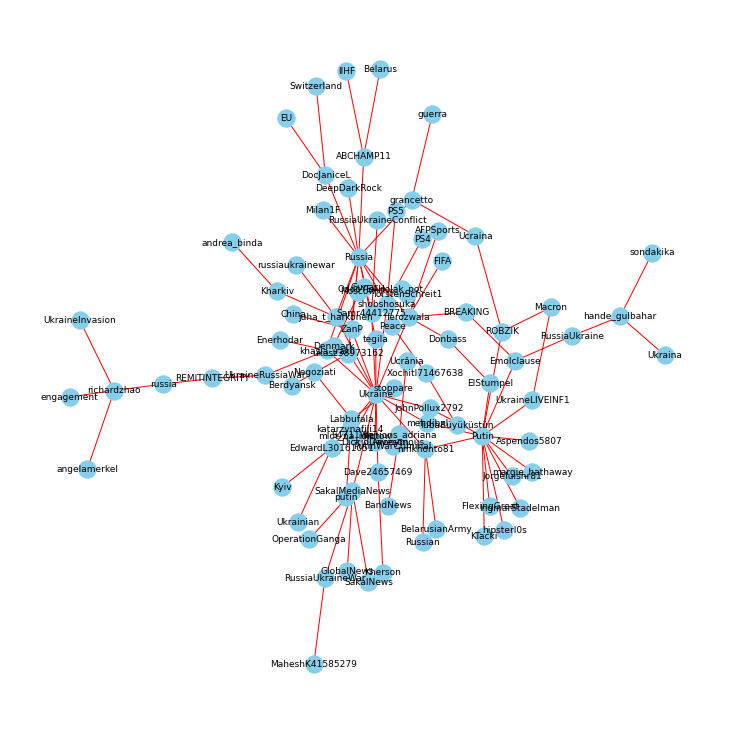

In [27]:
plt.figure(figsize=(10,10))
nx.draw(
  G, 
  with_labels =True,
  node_color='skyblue',
  edge_color='red',
  font_size=9,
  pos=nx.kamada_kawai_layout(G)
  )